In [1]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("diabetes_data.csv")

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.shape

(768, 9)

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


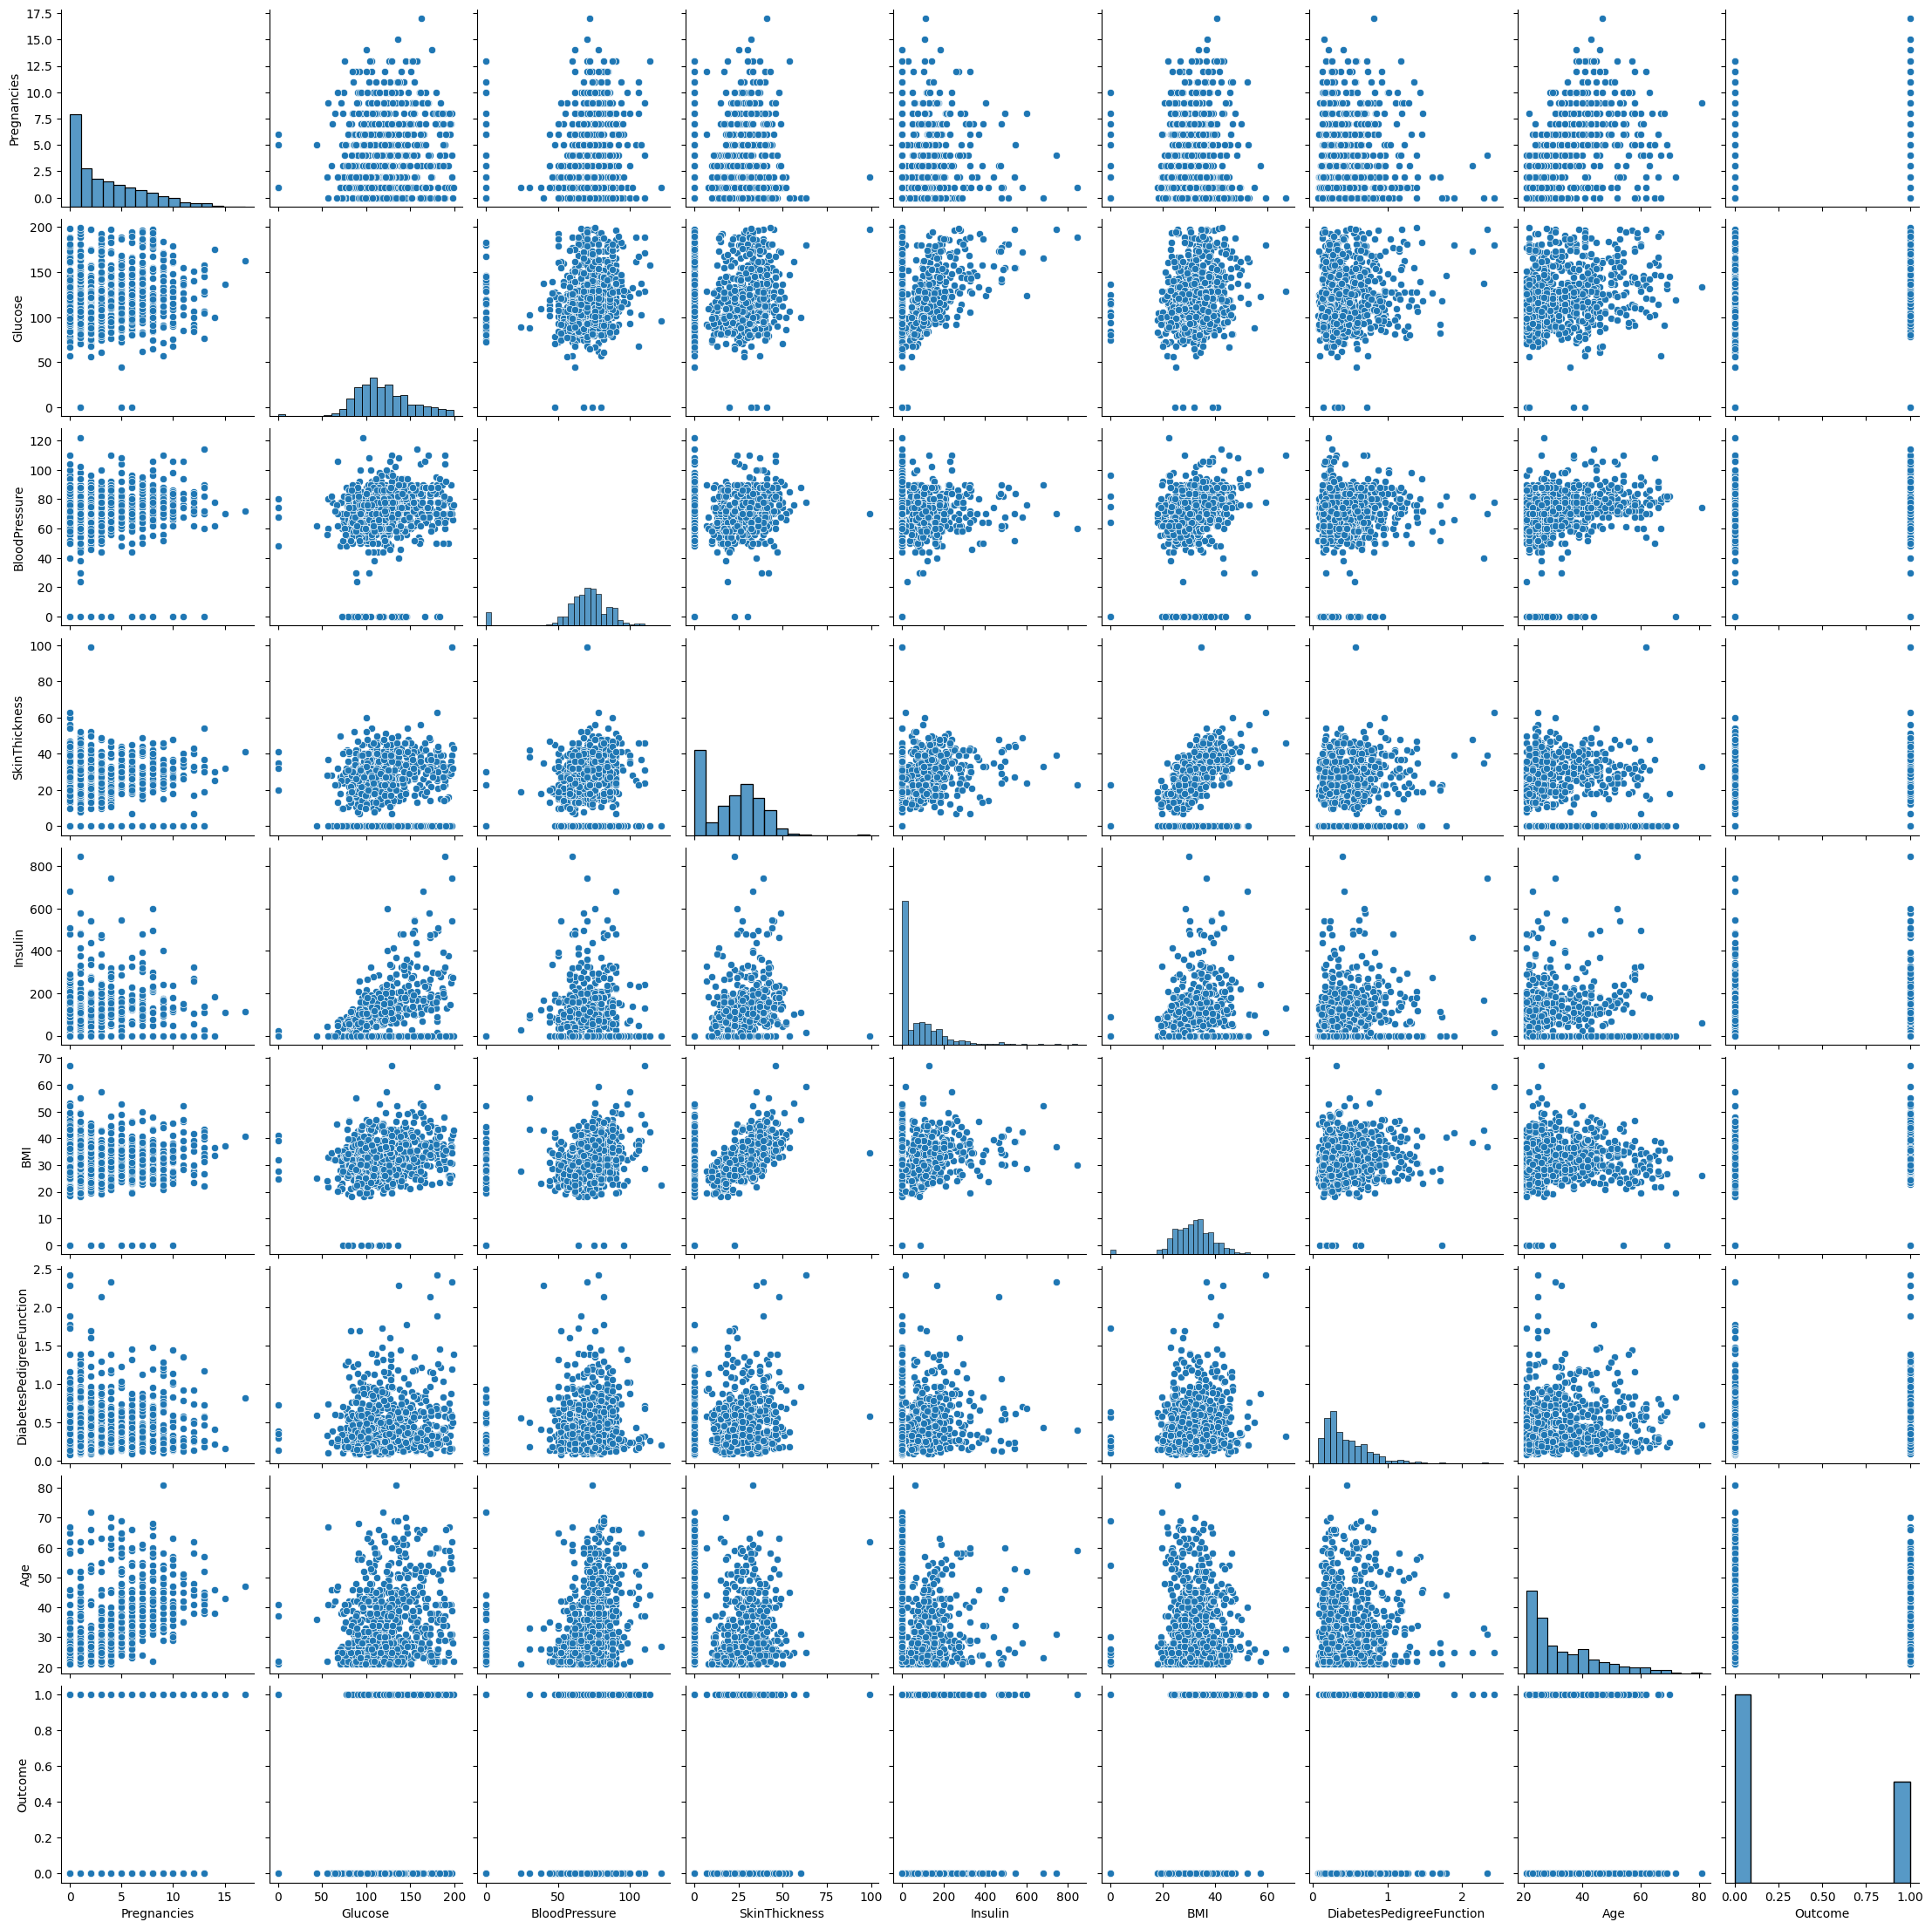

In [9]:
sns.pairplot(df,kind="scatter")

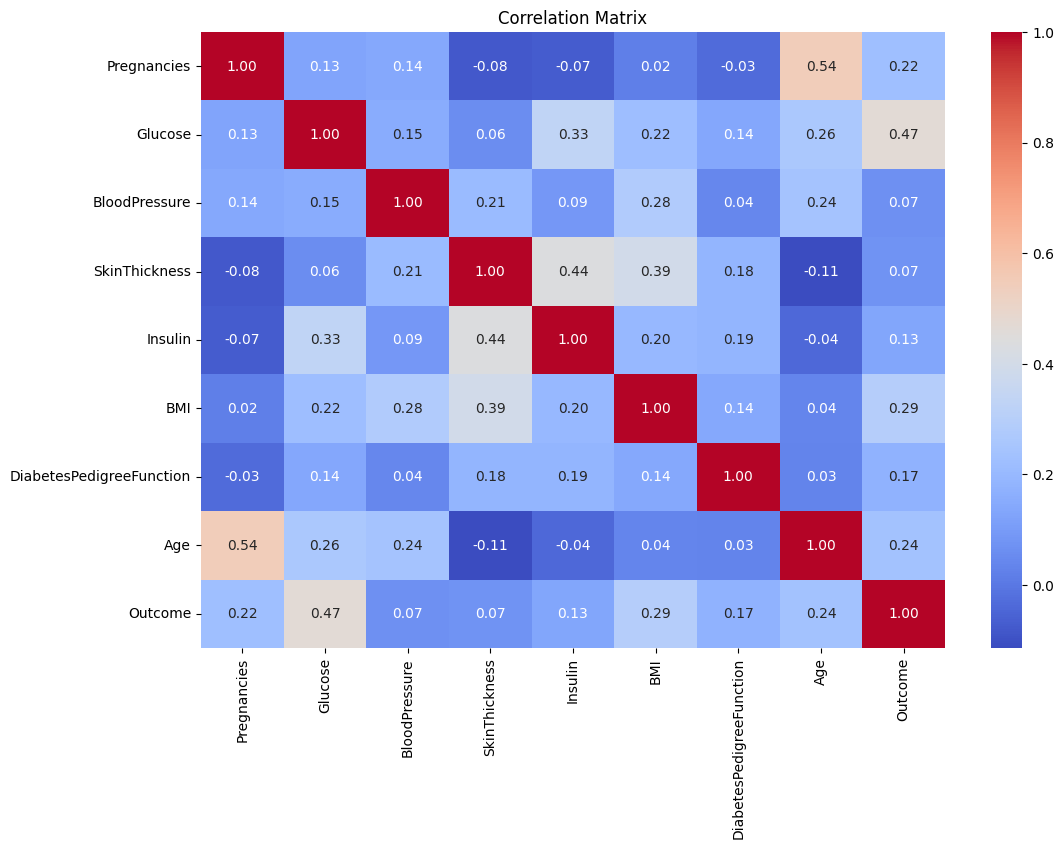

In [10]:
#checking the relation of different column with one another using correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

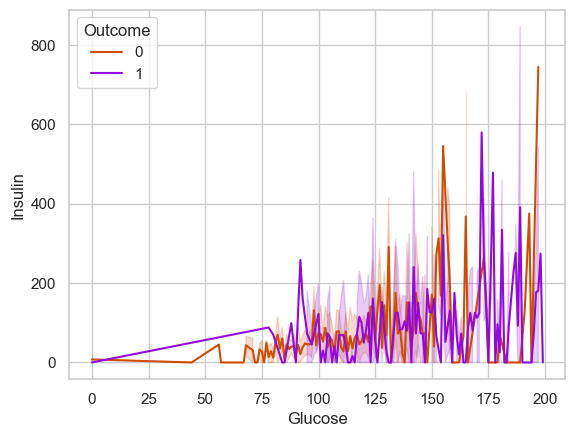

In [11]:
sns.set(style="whitegrid")
sns.lineplot(x="Glucose",y="Insulin",data=df,hue="Outcome",palette="gnuplot_r")
plt.show()

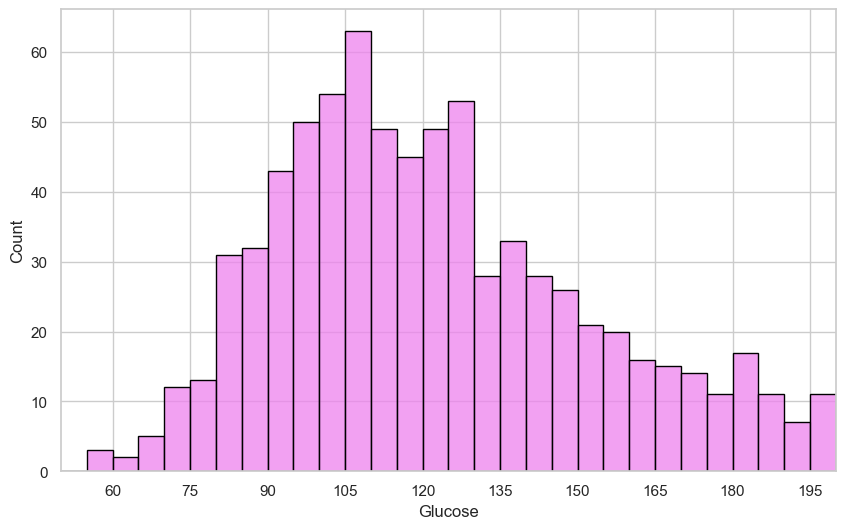

In [12]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
rang = np.arange(0, 201, 5)
sns.histplot(x=df["Glucose"],bins=rang,color="violet",edgecolor="black")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlim(50,200)
plt.show()

In [13]:
df["SkinThickness"].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

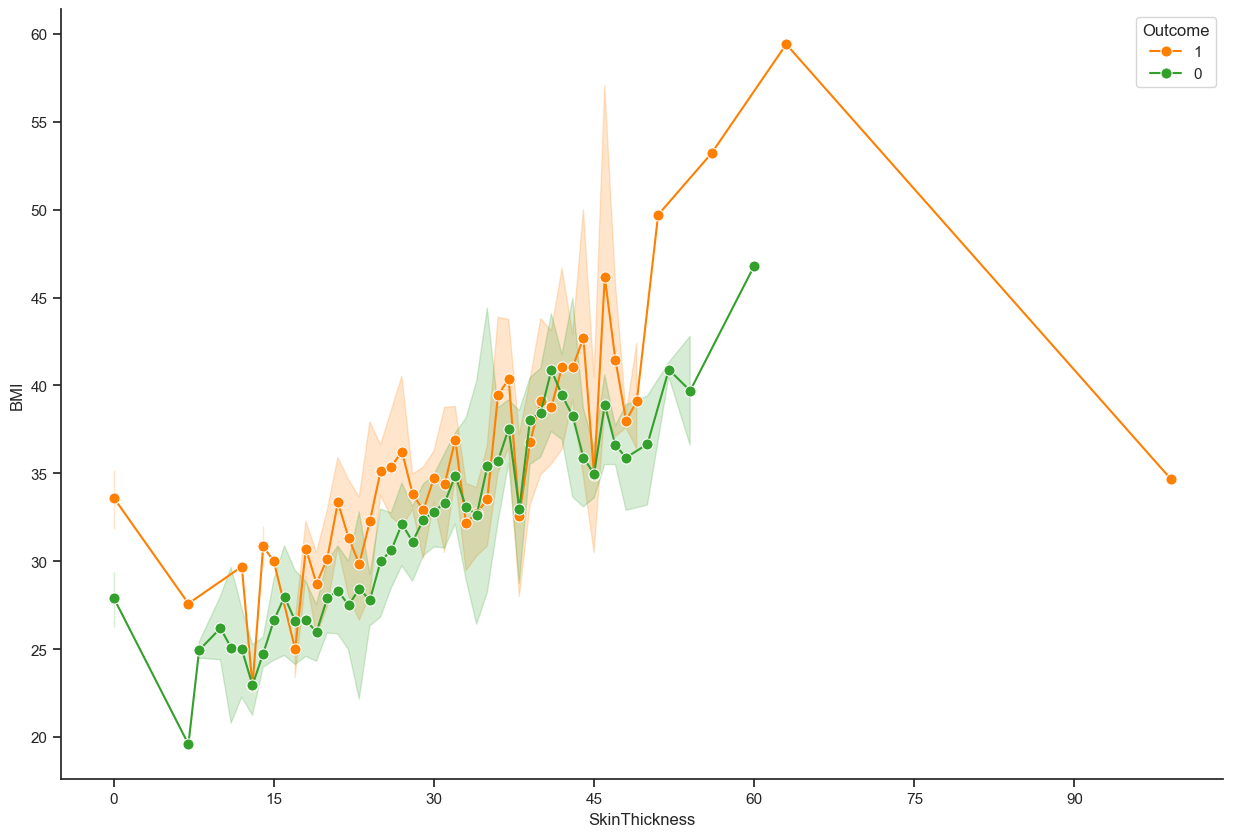

In [14]:
plt.figure(figsize=(15,10))
sns.set(style="ticks")
sns.lineplot(x="SkinThickness",y="BMI",hue="Outcome",data=df,marker="o",markersize=8,palette="Paired_r",hue_order=[1,0])
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
sns.despine()
plt.show()

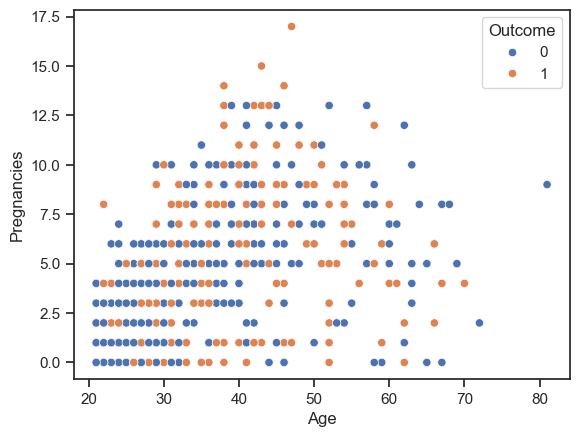

In [15]:
sns.set(style="ticks")
sns.scatterplot(y="Pregnancies",x="Age",data=df,hue="Outcome")
plt.show()

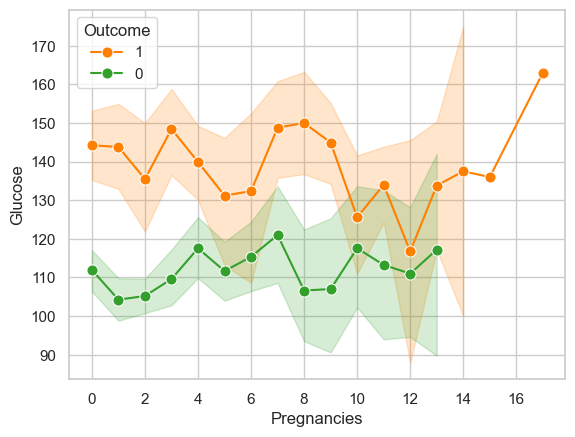

In [16]:
sns.set(style="whitegrid")
sns.lineplot(y="Glucose",x="Pregnancies",hue="Outcome",data=df,marker="o",markersize=8,palette="Paired_r",hue_order=[1,0])
from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))


<Axes: xlabel='Outcome', ylabel='Glucose'>

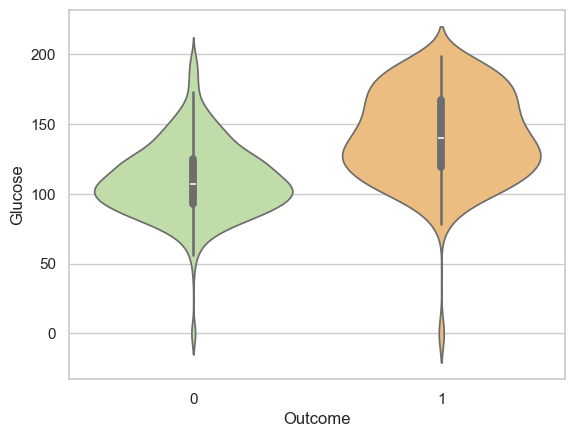

In [17]:
sns.violinplot(y="Glucose",x="Outcome",palette="Spectral_r",data=df)

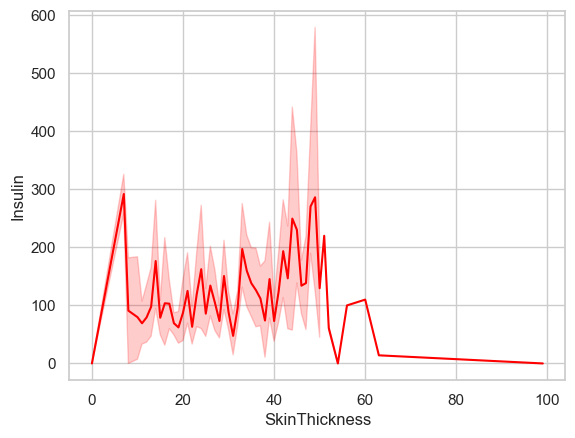

In [18]:
sns.set(style="whitegrid")
sns.lineplot(x="SkinThickness",y = "Insulin",data=df,color="red",)
plt.show()

In [19]:
# independent and dependent variable
X = df.iloc[:,:-1]
y=df.iloc[:,-1]

In [20]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


In [21]:
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier()
model_knn = KNeighborsClassifier(n_neighbors=3)
model_dt = DecisionTreeClassifier()
model_sc = SVC()

In [22]:
parameter_lr = {
    "penalty":['l1','l2','elasticnet'],
          'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10],
             'max_iter':[100,200,300]
}
parameter_rf ={
    "n_estimators":[50,100,150,200],
    "max_depth":[5,8,10],
    "min_samples_split":[2,4,6,8,10],
    "min_samples_leaf":[2,4,5],
    "max_features":['auto', 'sqrt', 'log2']
}

parameter_sc ={
    "C":[0.1,1,10],
    "kernel":["linear","rbf"],
    "gamma":["scale","auto"],
    "degree":[3,5]
}

parameter_xgb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 0.1]
}
parameter_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'], 
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

parameter_dt ={
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'criterion': ['gini', 'entropy']
}


In [23]:
classifier_regressor_lr=GridSearchCV(model_lr,param_grid=parameter_lr,scoring="accuracy",cv=5)
classifier_regressor_rf=GridSearchCV(model_rf,param_grid=parameter_rf,scoring="accuracy",cv=5)
classifier_regressor_xgb=GridSearchCV(model_xgb,param_grid=parameter_xgb,scoring="accuracy",cv=5)
classifier_regressor_dt=GridSearchCV(model_dt,param_grid=parameter_dt,scoring="accuracy",cv=5)
classifier_regressor_knn=GridSearchCV(model_knn,param_grid=parameter_knn,scoring="accuracy",cv=5)
classifier_regressor_sc=GridSearchCV(model_sc,param_grid=parameter_sc,scoring="accuracy",cv=5)

In [24]:
classifier_regressor_lr.fit(X_train,y_train)
classifier_regressor_sc.fit(X_train,y_train)
classifier_regressor_dt.fit(X_train,y_train)
classifier_regressor_knn.fit(X_train,y_train)
classifier_regressor_xgb.fit(X_train,y_train)
classifier_regressor_rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [25]:
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for Logistic Regression:", classifier_regressor_lr.best_params_)
print("Best Score for Logistic Regression:", classifier_regressor_lr.best_score_)
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for RandomForestClassifer:", classifier_regressor_rf.best_params_)
print("Best Score for RandomForestClassifier:", classifier_regressor_rf.best_score_)
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for SVC:", classifier_regressor_sc.best_params_)
print("Best Score for SVC:", classifier_regressor_sc.best_score_)
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for Xgboost:", classifier_regressor_xgb.best_params_)
print("Best Score for Xgboost:", classifier_regressor_xgb.best_score_)
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for Knearestneighbour:", classifier_regressor_knn.best_params_)
print("Best Score for  Knearestneighbour:", classifier_regressor_knn.best_score_)
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for Decisiontreeclassifier:", classifier_regressor_dt.best_params_)
print("Best Score for Decisiontreeclassifier:", classifier_regressor_dt.best_score_)

Best Parameters for Logistic Regression: {'C': 0.5, 'max_iter': 100, 'penalty': 'l2'}
Best Score for Logistic Regression: 0.7794902548725637
Best Parameters for RandomForestClassifer: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 100}
Best Score for RandomForestClassifier: 0.7847076461769117
Best Parameters for SVC: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Best Score for SVC: 0.7690554722638681
Best Parameters for Xgboost: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50, 'subsample': 0.7}
Best Score for Xgboost: 0.784647676161919
Best Parameters for Knearestneighbour: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Score for  Knearestneighbour: 0.7499999999999999
Best Parameters for Decisiontreeclassifier: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score for Decisiontreeclassifier: 0.736026

In [26]:
y_pred_lr = classifier_regressor_lr.predict(X_test)
y_pred_rf = classifier_regressor_rf.predict(X_test)
y_pred_sc = classifier_regressor_sc.predict(X_test)
y_pred_knn = classifier_regressor_knn.predict(X_test)
y_pred_dt = classifier_regressor_dt.predict(X_test)
y_pred_xgb = classifier_regressor_xgb.predict(X_test)

In [27]:
score_lr = accuracy_score(y_pred_lr,y_test)
print("score of logistic regression: ",score_lr)
score_knn = accuracy_score(y_pred_knn,y_test)
print("score of kNearestNeigbour Classifierscore_knn:",score_knn)
score_sc = accuracy_score(y_pred_sc,y_test)
print("score of Support Vector Classfier:",score_sc)
score_dt = accuracy_score(y_pred_dt,y_test)
print("score of Decision Tree Classifier:",score_dt)
score_rf = accuracy_score(y_pred_rf,y_test)
print("score of RandomForest Classifier:",score_rf)
score_xgb = accuracy_score(y_pred_xgb,y_test)
print("score of XGBoost Classifier:",score_xgb)

score of logistic regression:  0.7291666666666666
score of kNearestNeigbour Classifierscore_knn: 0.7135416666666666
score of Support Vector Classfier: 0.7291666666666666
score of Decision Tree Classifier: 0.734375
score of RandomForest Classifier: 0.7552083333333334
score of XGBoost Classifier: 0.71875


In [28]:
#classification_report 
print("classification report of logistic regression")
print(classification_report(y_pred_lr,y_test))
print("Classification Report of Support Vector Classfier")
print(classification_report(y_pred_sc,y_test))
print("Classification Report of K NearestNeighbour Classifier")
print(classification_report(y_pred_knn,y_test))
print("Classification Report of XGBoost Classifier")
print(classification_report(y_pred_xgb,y_test))
print("Classification Report of RandomForest Classifier")
print(classification_report(y_pred_rf,y_test))
print("Classfication Report of Decision Tree Classifier")
print(classification_report(y_pred_dt,y_test))

classification report of logistic regression
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       119
           1       0.65      0.62      0.63        73

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192

Classification Report of Support Vector Classfier
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       121
           1       0.64      0.62      0.63        71

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192

Classification Report of K NearestNeighbour Classifier
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       124
           1       0.59      0.60      0.60        68

    accuracy                    

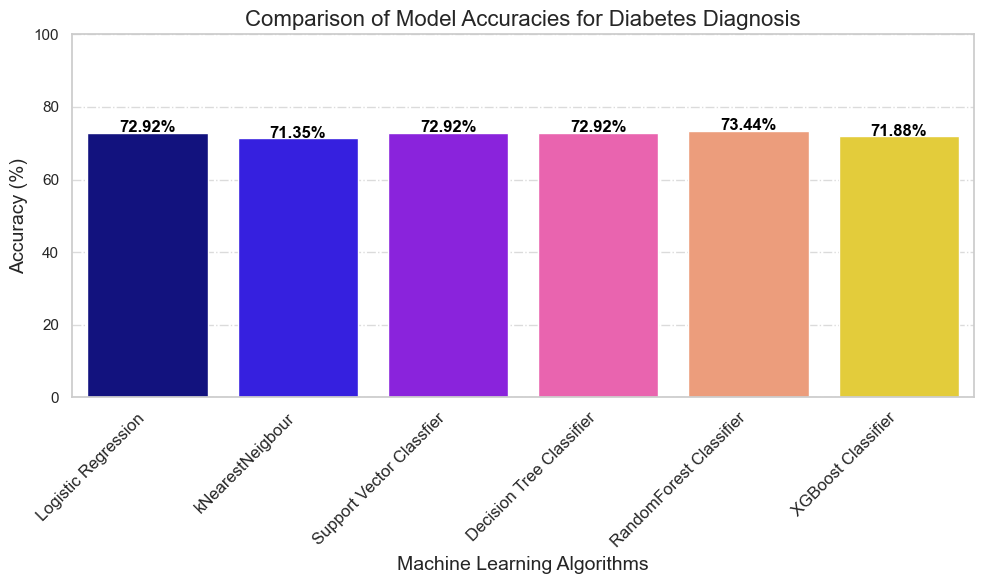

In [29]:
accuracy_results = {
    "Logistic Regression": 72.91666666666666,
    "kNearestNeigbour": 71.35416666666666,
    "Support Vector Classfier": 72.91666666666666,
    "Decision Tree Classifier": 72.91666666666666,
    "RandomForest Classifier": 73.4375,
    "XGBoost Classifier": 71.875
}
# Set up the plot size
plt.figure(figsize=(10, 6))

# Create the barplot with a different color palette
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette="gnuplot2")

# Format the plot with labels and title
plt.xlabel("Machine Learning Algorithms", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.title("Comparison of Model Accuracies for Diabetes Diagnosis", fontsize=16)

# Rotate x-axis labels and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylim(0,100)
# Display the accuracy percentage on top of each bar
for index, value in enumerate(accuracy_results.values()):
    plt.text(index, value + 0.2, f"{value:.2f}%", ha='center', fontsize=12, fontweight='bold', color='black')

# Add grid lines to improve readability
plt.grid(axis='y', linestyle='-.', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [38]:
input_data = (0,1,1,1,1,1,2,0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier_regressor_sc.predict(input_data_reshaped) #logistic regression is selected
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Diabetes')
else:
  print('The Person has Diabetes ')

[0]
The Person does not have a Diabetes


In [40]:
import pickle

filename = 'diabetes.sav'
pickle.dump(classifier_regressor_sc, open(filename, 'wb'))

# loading the saved model
loaded_model = pickle.load(open('diabetes.sav', 'rb'))
